In [1]:
import numpy as np
import matplotlib.pyplot as plt

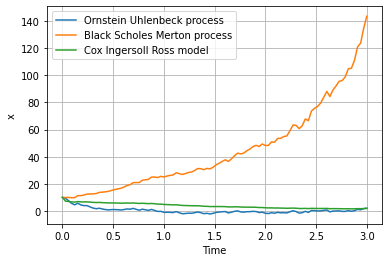

In [2]:
def brownian_motion(delta, N):
  W = np.zeros(N)
  for i in range (1, N):
    W[i] =  W[i-1] + np.random.normal(0, 1, 1) * np.sqrt(delta)
  return W

def Ornstein_Uhlenbeck_process(x0, W_values, N, delta, theta, sigma, t):
  ito_i = [np.exp(theta * t[i-1]) * (W_values[i] - W_values[i-1]) for i in range(1, N)]
  ito = [sum(ito_i [0 : i]) for i in range(1, N)]

  x = [np.exp(- theta * t_value) * (x0 + sigma * ito_value) for t_value, ito_value in zip(t, ito)]
  x = [x0] + x

  plt.plot(t, x, label = 'Ornstein Uhlenbeck process')


def Black_Scholes_Merton_process(x0, theta1, theta2, W_values, t):
  x = [x0 * np.exp((theta1 - theta2**2 / 2) * t_value + theta2 * W_value) for t_value, W_value in zip(t, W_values)]
  x[0] = x0

  plt.plot(t, x, label = 'Black Scholes Merton process')

def Cox_Ingersoll_Ross_model(theta1, theta2, theta3, N, t, W_values, x0):
  x = np.zeros(N)
  x[0] = x0
  ito = 0
  for i in range(1, N):
    ito += np.exp(theta2 * t[i-1]) * np.sqrt(x[i-1]) * (W_values[i] - W_values[i-1])
    x[i] = np.exp(- theta2 * t[i]) * ((x0 - theta1 / theta2) + theta3 * ito)

  plt.plot(t, x, label = 'Cox Ingersoll Ross model')

N = 100
T = 3
t = np.linspace(0, T, N)
delta = T/N
x0 = 10  
sigma = 3.5

W_values = brownian_motion(delta, N)

#task 1a
theta = 5
Ornstein_Uhlenbeck_process(x0, W_values, N, delta, theta, sigma, t)

#task 1c
theta1 = 1
theta2 = 0.2
Black_Scholes_Merton_process(x0, theta1, theta2, W_values, t)

#task 1b
theta1 = 1
theta2 = 0.4
theta3 = 0.35
Cox_Ingersoll_Ross_model(theta1, theta2, theta3, N, t, W_values, x0)

plt.grid()
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()


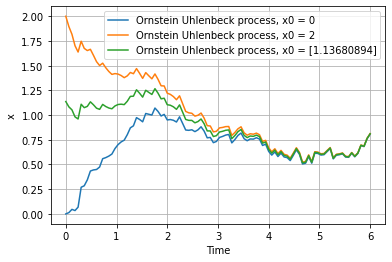

In [3]:
#task 3

def Ornstein_Uhlenbeck_process_2(x0, W_values, N, delta, theta, sigma, t):
  x = np.zeros(N)
  x[0] = x0
  ito = 0  
  for i in range(1, N):
    ito += np.exp(- theta * (t[i] - t[i-1])) * (W_values[i] - W_values[i-1])
    x[i] = mu + (x0 - mu) * np.exp(- theta * t[i]) + sigma * ito

  plt.plot(t, x, label = f'Ornstein Uhlenbeck process, x0 = {x0}')

N = 100
T = 6
t = np.linspace(0, T, N)
delta = T/N
mu = 1.2
sigma = 0.3
theta = 1

Ornstein_Uhlenbeck_process_2(0, W_values, N, delta, theta, sigma, t)
Ornstein_Uhlenbeck_process_2(2, W_values, N, delta, theta, sigma, t)
Ornstein_Uhlenbeck_process_2(np.random.normal(mu, sigma**2 / (2 * theta), 1), W_values, N, delta, theta, sigma, t)

plt.grid()
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()

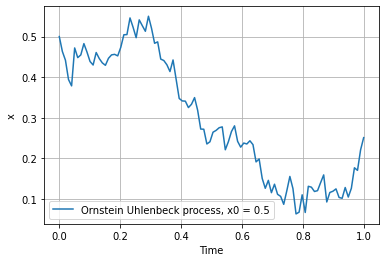

In [5]:
#task 4

N = 100
T = 1
t = np.linspace(0, T, N)
delta = T/N
mu = 0.5
sigma = 0.2
theta = 10

Ornstein_Uhlenbeck_process_2(0.5, W_values, N, delta, theta, sigma, t)

plt.grid()
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()

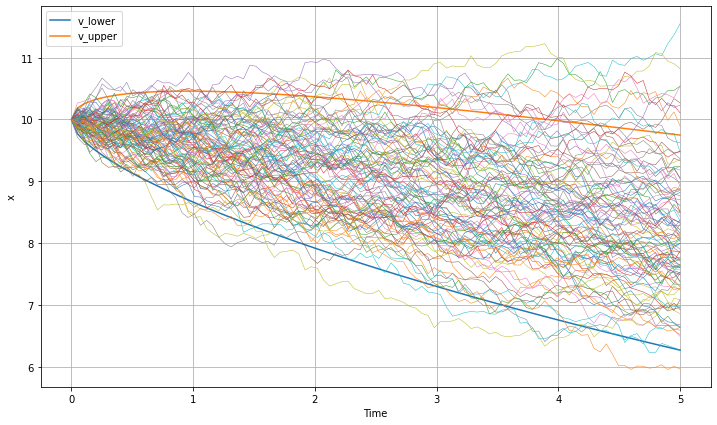

In [6]:
#task 2

from scipy.stats import norm

def confidence_interval(alpha, beta, sigma, N, t, x0):
  v_lower = np.zeros(N)
  v_upper = np.zeros(N)
  v_lower[0] = v_upper[0] = x0

  ksi = norm.ppf(1- 0.05/2)

  for i in range(1, N):
    k = 4 * alpha / (sigma**2)
    nu = sigma**2 * (1 - np.exp(- beta * (t[i]))) / (4 * beta)
    l = 4 * beta * np.exp(- beta * t[i]) * x0 / (sigma**2 * (1 - np.exp(- beta * t[i])))

    v_lower[i] = nu * (k + l - ksi * np.sqrt(2* (k + 2 * l)))
    v_upper[i] = nu * (k + l + ksi * np.sqrt(2* (k + 2 * l)))

  plt.plot(t, v_lower, label = 'v_lower')
  plt.plot(t, v_upper, label = 'v_upper')

def Cox_Ingersoll_Ross_model(alpha, beta, sigma, N, t, W_values, x0):
  x = np.zeros(N)
  x[0] = x0

  ito = 0
  for i in range(1, N):
    k = 4 * alpha / (sigma**2)
    nu = sigma**2 * (1 - np.exp(- beta * (t[i]))) / (4 * beta)
    l = 4 * beta * np.exp(- beta * t[i]) * x0 / (sigma**2 * (1 - np.exp(- beta * t[i])))

    ito += np.exp(beta * (t[i-1] - t[i])) * np.sqrt(x[i-1]) * (W_values[i] - W_values[i-1])
    x[i] = np.exp(- beta * t[i]) * x0 + alpha / beta * (1 - np.exp(- beta * t[i])) + sigma * ito

  plt.plot(t, x, linewidth=0.5)

N = 100
T = 5
t = np.linspace(0, T, N)
delta = T/N

theta1 = 1
theta2 = 0.05
theta3 = 0.15

alpha = theta1 * theta2
beta = theta2
sigma = theta3

plt.figure(figsize=(12, 7))

confidence_interval(alpha, beta, sigma, N, t, x0)

for i in range(100):
  W_values = brownian_motion(delta, N)
  Cox_Ingersoll_Ross_model(alpha, beta, sigma, N, t, W_values, x0)

plt.grid()
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()